In [155]:
import pandas
import ctn_benchmark
import seaborn as sns

%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [156]:
data = ctn_benchmark.Data('data')
df = pandas.DataFrame(data.data)

In [157]:
# Run this code block in order to look at the variance in tuning curve width while keeping c and g = 100
# and changing the increment of the intercepts :D
df = df[df.curve_width.notnull()]

In [158]:
df

,__builtins__,_backend,_childhood,_dt,_gui,_hide_overlay,_left_intercept,_mod,_number_of_neurons,_right_intercept,_seed,_t_glasses_on,_time_per_val,_time_per_val_testing,_train_int,curve_width,neg_dist,pos_dist,shift
0,"{'isinstance': <built-in function isinstance>,...",nengo,100,0.001,False,False,0.94,0.401426,200,1.00,1,100.0,0.5,0.5,45,27.0,13.0,14.0,-1
1,"{'isinstance': <built-in function isinstance>,...",nengo,100,0.001,False,False,0.93,0.401426,200,0.96,1,100.0,0.5,0.5,45,31.0,15.0,16.0,3
2,"{'isinstance': <built-in function isinstance>,...",nengo,100,0.001,False,False,0.80,0.401426,200,1.00,0,100.0,0.5,0.5,45,35.0,17.0,18.0,2
3,"{'isinstance': <built-in function isinstance>,...",nengo,100,0.001,False,False,0.93,0.401426,200,0.94,0,100.0,0.5,0.5,45,29.0,14.0,15.0,1
4,"{'isinstance': <built-in function isinstance>,...",nengo,100,0.001,False,False,0.90,0.401426,200,0.96,0,100.0,0.5,0.5,45,32.0,16.0,16.0,2
8,"{'isinstance': <built-in function isinstance>,...",nengo,100,0.001,False,False,0.97,0.401426,200,1.00,0,100.0,0.5,0.5,45,15.0,7.0,8.0,3
11,"{'isinstance': <built-in function isinstance>,...",nengo,100,0.001,False,False,0.94,0.401426,200,0.99,1,100.0,0.5,0.5,45,28.0,14.0,14.0,-2
13,"{'isinstance': <built-in function isinstance>,...",nengo,100,0.001,False,False,0.95,0.401426,200,0.96,1,100.0,0.5,0.5,45,30.0,15.0,15.0,1
14,"{'isinstance': <built-in function isinstance>,...",nengo,100,0.001,False,False,0.97,0.401426,200,0.97,0,100.0,0.5,0.5,45,29.0,14.0,15.0,-2
15,"{'isinstance': <built-in function isinstance>,...",nengo,100,0.001,False,False,0.91,0.401426,200,0.91,0,100.0,0.5,0.5,45,31.0,15.0,16.0,-1


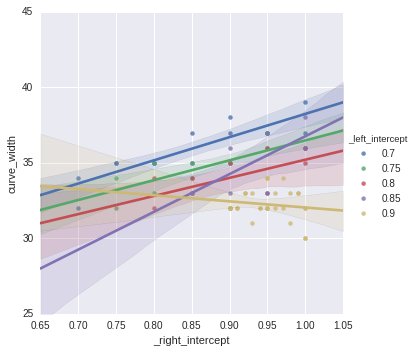

In [159]:
g = sns.lmplot('_right_intercept', 'curve_width', data = df.loc[df['_left_intercept'] < 0.91], hue = '_left_intercept')

g.set(ylim=(25, 45))

In [160]:
df['rat'] = df['_left_intercept']/df['_right_intercept']

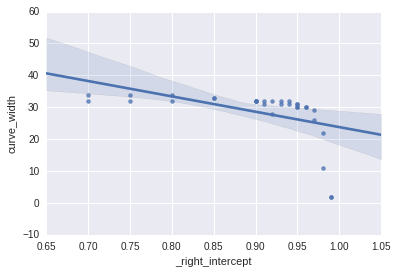

In [161]:
#data = df.loc[df['rat'] == 1.0]
#print(data)
o = sns.regplot('_right_intercept', 'curve_width', data = df.loc[df['rat'] == 1.0])
#If intercepts are limited to the same number, avg curve width isaround 33
#Wehn you hit inte4rcept values between .9 and 1, things get funky

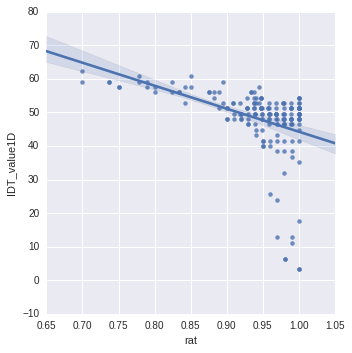

In [162]:
# If we want to know which approximate range of intercepts gives us the correct curve width, we compute 
# what their values would be in degrees and itd increments
# In their exposere graphs, the width of the owl's tuning curves were ~50 picoseconds in one direction
# which is 100 when overall width is considered. 

df['IDT_value1D'] = df['curve_width']*4/2.5
r = sns.lmplot('rat','IDT_value1D', data = df)

In [163]:
# Filter data so that we only look at the range/changeds for values between 0.9 and 1.0
df = df.loc[df['_left_intercept'] >= 0.9]

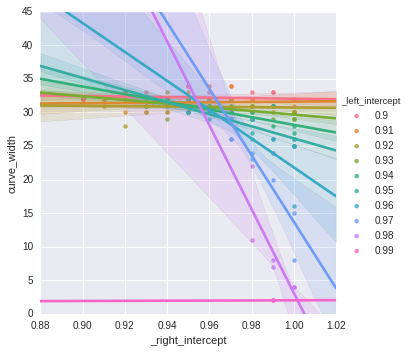

In [164]:
small_range = sns.lmplot('_right_intercept', 'curve_width', data =df, hue = '_left_intercept')

small_range.set(ylim=(0, 45))